In [5]:
import pandas as pd
columns=[
    "target",
    "tweet_id",
    "date",
    "query",
    "user",
    "text"
]
df=pd.read_csv("sentiment.csv",
               header=None,
               names=columns,
               encoding="latin1",
               engine="python",
               on_bad_lines="skip")
print(df.head())

   target    tweet_id                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [6]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [7]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

<h2>Data Processing</h2>

In [9]:
#checking the number of rows and columns
df.shape

(1600000, 6)

In [10]:
#printitng first 5 rows of dataset
df.head()

,target,tweet_id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
#counting the number of missing values in the dataset
df.isnull().sum()

target      0
tweet_id    0
date        0
query       0
user        0
text        0
dtype: int64

In [12]:
#checking the distributuin of the target column
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [13]:
#convert the target 4 to 1
df.replace({'target':{4:1}},inplace=True)

In [14]:
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

<h2>Note:</h2>
<h4>0--> Negitive Tweet</h4>
<h4>1--> Positive Tweet</h4>


<h2>Stemming</h2>
<h4>stemming is the process of reducing to its Root word</h4>
<p> example:actor,actress,acting=act</p>

In [15]:
port_stem=PorterStemmer()


In [16]:
def stemming(content):
    stemmed_content=re.sub("[^a-zA-z]",' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content



In [17]:
df["stemmed_content"]=df["text"].apply(stemming) #50 miutes as to be taken for exutuion

In [18]:
df.head()

,target,tweet_id,date,query,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [19]:
print(df["stemmed_content"])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [20]:
print(df['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [21]:
#separate the data and label
x=df['stemmed_content'].values
y=df['target'].values

In [22]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [23]:
print(y)

[0 0 0 ... 1 1 1]


<h4> spilliting the data to training data and test data</h4>

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(1600000,) (1280000,) (320000,)


In [26]:
print(x_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [27]:
print(x_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


<h5>converting the textual data to numeric data
#because ml model cannot undrestand the numeric data<br> we have to convert the textual to numeric
#this process is called as the feature_extraction<br>
we are use the method is called as vectorizer</h5>

In [28]:
vectorizer=TfidfVectorizer()

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [29]:
print(x_train)

  (0, 464940)	0.4483581441053542
  (0, 247667)	0.4215060595161854
  (0, 116318)	0.3749338694119814
  (0, 194823)	0.5274064910069903
  (0, 372989)	0.3583819096048567
  (0, 458421)	0.27228112326228093
  (1, 169453)	1.0
  (2, 304223)	0.1678648733603879
  (2, 140239)	0.20289994039686138
  (2, 159240)	0.18800868496584808
  (2, 187474)	0.16194060015844067
  (2, 429906)	0.15168139293444055
  (2, 281186)	0.24137202118772233
  (2, 465311)	0.33480686186877023
  (2, 83506)	0.31303964332256906
  (2, 455221)	0.3296073093697297
  (2, 427034)	0.32103058232997417
  (2, 137276)	0.29069581876534506
  (2, 427967)	0.18706371586911208
  (2, 132152)	0.1891875792321668
  (2, 116318)	0.45905705320412793
  (3, 181609)	0.3745702863460754
  (3, 432396)	0.2708400841098632
  (3, 408311)	0.3941744062368762
  (3, 61032)	0.52009780709937
  :	:
  (1279996, 409874)	0.21996814268672968
  (1279996, 455685)	0.27108924963905606
  (1279996, 335154)	0.21190629789318696
  (1279996, 250767)	0.22319402802219876
  (1279996, 3069

In [30]:
print(y_train)

[1 1 0 ... 1 1 0]


<h2> Training the Machine Learning Model</h2>

<h2>Logistic Regression</h2>

In [31]:
model1=LogisticRegression(max_iter=1000)

In [32]:
model1.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

<h2> Model Evalution</h2>
<h3> Accurcy Scope</h3>

In [33]:
#accurcy on training data
x_train_prediction=model1.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [34]:
print("accuracy scpre on training data:",training_data_accuracy)

accuracy scpre on training data: 0.8117


In [35]:
x_test_prediction=model1.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [36]:
print("accuracy scope on training data:",test_data_accuracy)

accuracy scope on training data: 0.778559375


<p> Model accuracy=77.8%</p>

<h2>saveing the trained model</h2>

In [37]:
import pickle

In [38]:
filename='trained_model.sav'
pickle.dump(model1,open(filename,'wb'))
pickle.dump(vectorizer,open("vectorizer.pk1","wb"))

<h2> Using the saved model for future prediction</h2>

In [39]:
#loading the saved model
loaded_model=pickle.load(open("trained_model.sav",'rb'))

In [40]:
x_new=x_test[200]
print(y_test[200])
prediction=loaded_model.predict(x_new)
print(prediction)
if prediction[0]==0:
    print("Negitive Tweet")
else:
    print("Positive Tweet")

1
[1]
Positive Tweet


In [41]:
x_new=x_test[3]
print(y_test[3])
prediction=loaded_model.predict(x_new)
print(prediction)
if prediction[0]==0:
    print("Negitive Tweet")
else:
    print("Positive Tweet")

0
[0]
Negitive Tweet


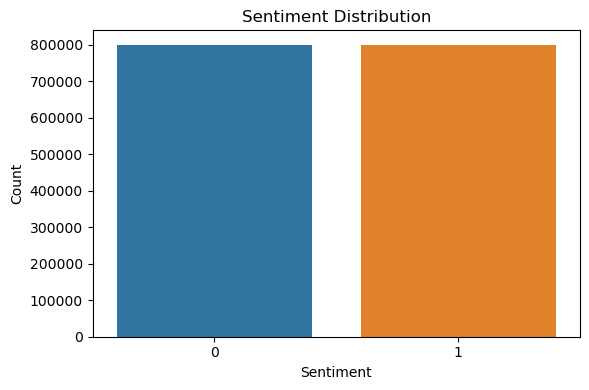

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['target'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

Text(0.5, 1.0, 'Sentiment Percentage')

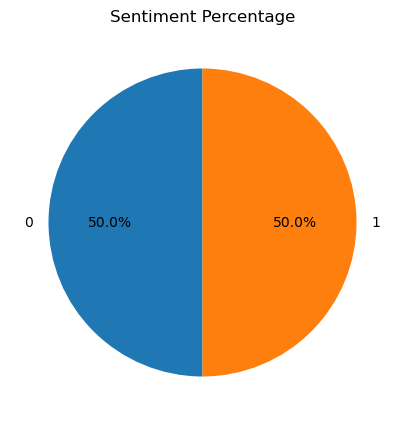

In [44]:
plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Percentage")

In [46]:
sentiment_map = {
    0: "😞 Negative",
    1: "😊 Positive"
}

df["sentiment_emoji"] = df["target"].map(sentiment_map)

/tmp/ipykernel_4561/2870795112.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  func(*args, **kwargs)
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


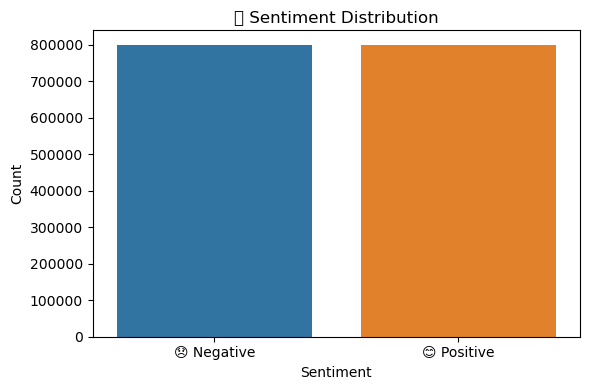

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df["sentiment_emoji"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title("📊 Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

Text(0.5, 1.0, 'Sentiment Percentage')

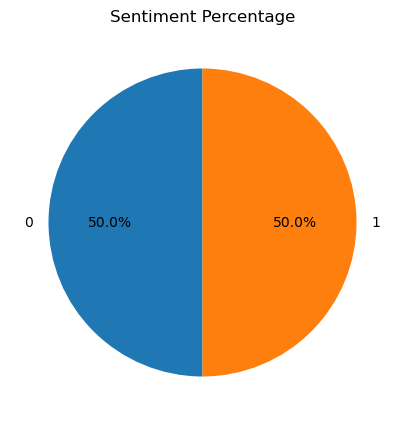

In [48]:
plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Percentage")

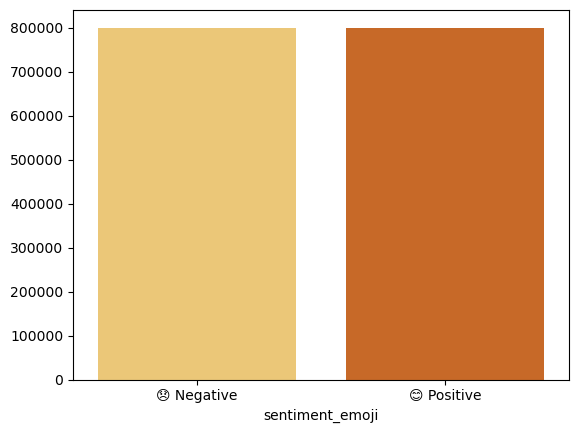

In [59]:
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=sns.color_palette("YlOrBr", 2)
)
plt.savefig("bar_chart.png")

/tmp/ipykernel_4561/1304455410.py:11: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  plt.savefig("pie_chart.png")
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


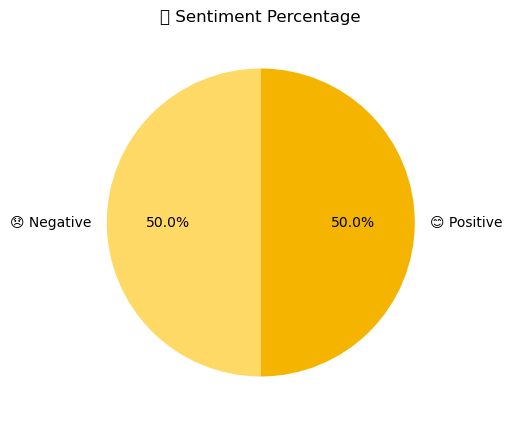

In [58]:
plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#FFD966", "#F4B400"]
)
plt.title("🥧 Sentiment Percentage")

plt.savefig("pie_chart.png")

/tmp/ipykernel_4561/2207707584.py:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.savefig("confusion_matrix.png")
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


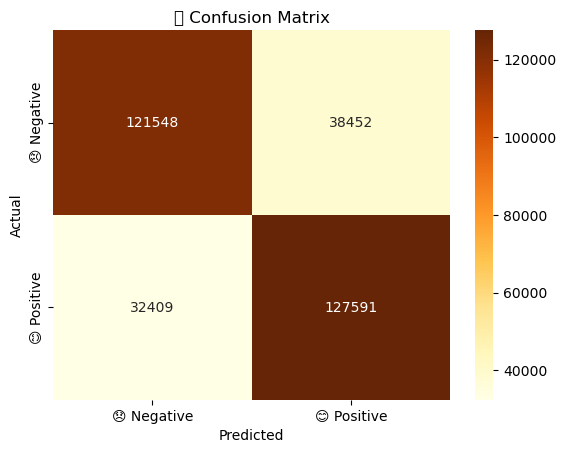

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model1.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlOrBr",
    xticklabels=["😞 Negative", "😊 Positive"],
    yticklabels=["😞 Negative", "😊 Positive"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🎯 Confusion Matrix")
plt.savefig("confusion_matrix.png")
